# Second Analysis Script for Formal Bayesian Model Calibration
## Purpose of the Script
This script is used the cut off the burn in period and then randomyly sample however many parameter sets we want sampled from the burned in/converge sets. It then saves the randomly sampled sets to a csv file for us to use to run the model.

## Fall Semester Data

In [200]:
import numpy as np
import pandas as pd
from chainconsumer import ChainConsumer
import matplotlib.pyplot as plt
from random import sample
import seaborn as sns
from scipy.stats import mode

First we read in the CSV files we need, one for each chain. Will likely need to change path names every time. These first chains should be the ones run with fall data.

In [201]:
# FALL 2020
# Reads in CSVs

MCMC_chain_1_F = pd.read_csv('/Users/meghanchilds/Desktop/Dissertation_Research/COVID-19-Model-Formal-Calibration/MCMC CSV Files/std version of ll weighting (multiplied std by 4) sept 24/MCMC_Chain_Fall_Data_All_Params_100_iters_rit_data_stochastic_new_ll_adapted_binom_initial_iso_fixed_new_weighting_4_times_[13].csv', names = ['Iter', 'Freq Es', 'Time to Recovery',  'Percent Advancing', 'Rt' ,'Symptom Case Fatality', 'Days to Incubation', 'Test Sensitivity', 'Test Specificity', 'New Infect', 'Initial Infect', 'Initial Iso' ])
MCMC_chain_2_F = pd.read_csv('/Users/meghanchilds/Desktop/Dissertation_Research/COVID-19-Model-Formal-Calibration/MCMC CSV Files/std version of ll weighting (multiplied std by 4) sept 24/MCMC_Chain_Fall_Data_All_Params_100_iters_rit_data_stochastic_new_ll_adapted_binom_initial_iso_fixed_new_weighting_4_times_[277].csv', names = ['Iter', 'Freq Es', 'Time to Recovery',  'Percent Advancing', 'Rt' ,'Symptom Case Fatality', 'Days to Incubation', 'Test Sensitivity', 'Test Specificity', 'New Infect', 'Initial Infect', 'Initial Iso'])
MCMC_chain_3_F = pd.read_csv('/Users/meghanchilds/Desktop/Dissertation_Research/COVID-19-Model-Formal-Calibration/MCMC CSV Files/std version of ll weighting (multiplied std by 4) sept 24/MCMC_Chain_Fall_Data_All_Params_100_iters_rit_data_stochastic_new_ll_adapted_binom_initial_iso_fixed_new_weighting_4_times_[855].csv', names = ['Iter', 'Freq Es', 'Time to Recovery',  'Percent Advancing', 'Rt' ,'Symptom Case Fatality', 'Days to Incubation', 'Test Sensitivity', 'Test Specificity', 'New Infect', 'Initial Infect', 'Initial Iso'])
MCMC_chain_4_F = pd.read_csv('/Users/meghanchilds/Desktop/Dissertation_Research/COVID-19-Model-Formal-Calibration/MCMC CSV Files/std version of ll weighting (multiplied std by 4) sept 24/MCMC_Chain_Fall_Data_All_Params_100_iters_rit_data_stochastic_new_ll_adapted_binom_initial_iso_fixed_new_weighting_4_times_[974].csv', names = ['Iter', 'Freq Es', 'Time to Recovery',  'Percent Advancing', 'Rt' ,'Symptom Case Fatality', 'Days to Incubation', 'Test Sensitivity', 'Test Specificity', 'New Infect', 'Initial Infect', 'Initial Iso'])


Then add rand ints and we print to visually check.

In [202]:
MCMC_chain_1_F['Rand Seed'] = 13*np.ones(MCMC_chain_1_F.shape[0])

MCMC_chain_2_F['Rand Seed'] = 277*np.ones(MCMC_chain_2_F.shape[0])

MCMC_chain_3_F['Rand Seed'] = 855*np.ones(MCMC_chain_3_F.shape[0])

MCMC_chain_4_F['Rand Seed'] = 974*np.ones(MCMC_chain_4_F.shape[0])
MCMC_chain_3_F

,Iter,Freq Es,Time to Recovery,Percent Advancing,Rt,Symptom Case Fatality,Days to Incubation,Test Sensitivity,Test Specificity,New Infect,Initial Infect,Initial Iso,Rand Seed
0,0,9.0,11.967730,37.828339,1.627654,0.001356,5.592222,0.782842,1.226870,8.0,7.0,2.895351,855.0
1,1,9.0,11.967730,37.828339,1.627654,0.001356,5.592222,0.782842,1.226870,8.0,7.0,2.895351,855.0
2,2,9.0,11.967730,37.828339,1.627654,0.001356,5.592222,0.782842,1.226870,8.0,7.0,2.895351,855.0
3,3,9.0,11.967730,37.828339,1.627654,0.001356,5.592222,0.782842,1.226870,8.0,7.0,2.895351,855.0
4,4,9.0,11.915638,37.682385,1.621561,0.001400,5.624050,0.781707,1.226548,8.0,7.0,2.969061,855.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,39995,8.0,15.079907,19.735023,1.313108,0.000890,9.640109,0.880623,1.243802,11.0,7.0,1.254470,855.0
399996,39996,8.0,15.079907,19.735023,1.313108,0.000890,9.640109,0.880623,1.243802,11.0,7.0,1.254470,855.0
399997,39997,8.0,15.079907,19.735023,1.313108,0.000890,9.640109,0.880623,1.243802,11.0,7.0,1.254470,855.0
399998,39998,8.0,15.079907,19.735023,1.313108,0.000890,9.640109,0.880623,1.243802,11.0,7.0,1.254470,855.0


In [203]:
# FALL 2020

del MCMC_chain_1_F['Iter']

del MCMC_chain_2_F['Iter']

del MCMC_chain_3_F['Iter']

del MCMC_chain_4_F['Iter']


In [204]:
MCMC_chain_1_F.reset_index(inplace = True)
MCMC_chain_2_F.reset_index(inplace = True)
MCMC_chain_3_F.reset_index(inplace = True)
MCMC_chain_4_F.reset_index(inplace = True)
MCMC_chain_4_F

,index,Freq Es,Time to Recovery,Percent Advancing,Rt,Symptom Case Fatality,Days to Incubation,Test Sensitivity,Test Specificity,New Infect,Initial Infect,Initial Iso,Rand Seed
0,0,2.0,15.817197,25.252065,1.001367,0.001701,9.837210,0.842631,1.237666,19.0,16.0,4.693911,974.0
1,1,2.0,15.691677,25.249523,0.981189,0.001609,9.863985,0.841190,1.237458,19.0,17.0,4.848579,974.0
2,2,2.0,15.630728,25.433301,1.000044,0.001683,9.791771,0.841287,1.238049,18.0,16.0,4.888724,974.0
3,3,2.0,15.630728,25.433301,1.000044,0.001683,9.791771,0.841287,1.238049,18.0,16.0,4.888724,974.0
4,4,3.0,15.596836,25.556290,1.000021,0.001566,9.793011,0.842565,1.237870,19.0,16.0,4.914142,974.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,399995,5.0,11.862320,13.749934,1.099661,0.006468,9.877019,0.783066,1.244445,10.0,18.0,2.098911,974.0
399996,399996,5.0,11.862320,13.749934,1.099661,0.006468,9.877019,0.783066,1.244445,10.0,18.0,2.098911,974.0
399997,399997,5.0,11.862320,13.749934,1.099661,0.006468,9.877019,0.783066,1.244445,10.0,18.0,2.098911,974.0
399998,399998,5.0,11.862320,13.749934,1.099661,0.006468,9.877019,0.783066,1.244445,10.0,18.0,2.098911,974.0


In [205]:
iter_1 = MCMC_chain_1_F.pop('index')
iter_2 = MCMC_chain_2_F.pop('index')
iter_3 = MCMC_chain_3_F.pop('index')
iter_4 = MCMC_chain_4_F.pop('index')


In [206]:
MCMC_chain_1_F.insert(11, 'index', iter_1)
MCMC_chain_2_F.insert(11, 'index', iter_2)
MCMC_chain_3_F.insert(11, 'index', iter_3)
MCMC_chain_4_F.insert(11, 'index', iter_4)

In [207]:
MCMC_chain_4_F


,Freq Es,Time to Recovery,Percent Advancing,Rt,Symptom Case Fatality,Days to Incubation,Test Sensitivity,Test Specificity,New Infect,Initial Infect,Initial Iso,index,Rand Seed
0,2.0,15.817197,25.252065,1.001367,0.001701,9.837210,0.842631,1.237666,19.0,16.0,4.693911,0,974.0
1,2.0,15.691677,25.249523,0.981189,0.001609,9.863985,0.841190,1.237458,19.0,17.0,4.848579,1,974.0
2,2.0,15.630728,25.433301,1.000044,0.001683,9.791771,0.841287,1.238049,18.0,16.0,4.888724,2,974.0
3,2.0,15.630728,25.433301,1.000044,0.001683,9.791771,0.841287,1.238049,18.0,16.0,4.888724,3,974.0
4,3.0,15.596836,25.556290,1.000021,0.001566,9.793011,0.842565,1.237870,19.0,16.0,4.914142,4,974.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,5.0,11.862320,13.749934,1.099661,0.006468,9.877019,0.783066,1.244445,10.0,18.0,2.098911,399995,974.0
399996,5.0,11.862320,13.749934,1.099661,0.006468,9.877019,0.783066,1.244445,10.0,18.0,2.098911,399996,974.0
399997,5.0,11.862320,13.749934,1.099661,0.006468,9.877019,0.783066,1.244445,10.0,18.0,2.098911,399997,974.0
399998,5.0,11.862320,13.749934,1.099661,0.006468,9.877019,0.783066,1.244445,10.0,18.0,2.098911,399998,974.0


Then we check for nan values.

In [208]:
MCMC_chain_1_F.isnull().values.any()


False

In [209]:
MCMC_chain_2_F.isnull().values.any()


False

In [210]:
MCMC_chain_3_F.isnull().values.any()


False

In [211]:
MCMC_chain_4_F.isnull().values.any()


False

Then we print to visually check.

In [212]:
MCMC_chain_3_F 

,Freq Es,Time to Recovery,Percent Advancing,Rt,Symptom Case Fatality,Days to Incubation,Test Sensitivity,Test Specificity,New Infect,Initial Infect,Initial Iso,index,Rand Seed
0,9.0,11.967730,37.828339,1.627654,0.001356,5.592222,0.782842,1.226870,8.0,7.0,2.895351,0,855.0
1,9.0,11.967730,37.828339,1.627654,0.001356,5.592222,0.782842,1.226870,8.0,7.0,2.895351,1,855.0
2,9.0,11.967730,37.828339,1.627654,0.001356,5.592222,0.782842,1.226870,8.0,7.0,2.895351,2,855.0
3,9.0,11.967730,37.828339,1.627654,0.001356,5.592222,0.782842,1.226870,8.0,7.0,2.895351,3,855.0
4,9.0,11.915638,37.682385,1.621561,0.001400,5.624050,0.781707,1.226548,8.0,7.0,2.969061,4,855.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,8.0,15.079907,19.735023,1.313108,0.000890,9.640109,0.880623,1.243802,11.0,7.0,1.254470,399995,855.0
399996,8.0,15.079907,19.735023,1.313108,0.000890,9.640109,0.880623,1.243802,11.0,7.0,1.254470,399996,855.0
399997,8.0,15.079907,19.735023,1.313108,0.000890,9.640109,0.880623,1.243802,11.0,7.0,1.254470,399997,855.0
399998,8.0,15.079907,19.735023,1.313108,0.000890,9.640109,0.880623,1.243802,11.0,7.0,1.254470,399998,855.0


Then we need the row length and column length for further calculations.

In [213]:
row_length_F = len(MCMC_chain_1_F.iloc[:,0]) # finds row length for ease and general indexing 
col_length_F = len(MCMC_chain_1_F.iloc[0, :]) - 2 # finds col length for ease and general indexing 

In [214]:
print(row_length_F)
print(col_length_F)

400000
11


Then we use our convergence threshold and select past that threshold to be our burned in sets. We chop off the sets until that threshold as they are from the burn in period. You will use the convergence threshold you determined in the first script.

In [215]:
# Lets set that threshold for which we are hoping it converges before we change this until the parameter sets converge
convergence_threshold =  10000




In [216]:
# FALL 2020
# Isolate burned in chains


MCMC_chain_1_F_Burn_In=MCMC_chain_1_F.iloc[convergence_threshold:row_length_F, :] # starts where we know data is burned in
print(len(MCMC_chain_1_F_Burn_In)) # checks to make sure we have the length chain we want


MCMC_chain_2_F_Burn_In = MCMC_chain_2_F.iloc[convergence_threshold:row_length_F, :] # starts where we know data is burned in
print(len(MCMC_chain_2_F_Burn_In))# checks to make sure we have the length chain we want

MCMC_chain_3_F_Burn_In = MCMC_chain_3_F.iloc[convergence_threshold:row_length_F, :] # starts where we know data is burned in
print(len(MCMC_chain_3_F_Burn_In))# checks to make sure we have the length chain we want

MCMC_chain_4_F_Burn_In = MCMC_chain_4_F.iloc[convergence_threshold:row_length_F, :] # starts where we know data is burned in
print(len(MCMC_chain_4_F_Burn_In))# checks to make sure we have the length chain we want



390000
390000
390000
390000


In [217]:
MCMC_chain_4_F_Burn_In

,Freq Es,Time to Recovery,Percent Advancing,Rt,Symptom Case Fatality,Days to Incubation,Test Sensitivity,Test Specificity,New Infect,Initial Infect,Initial Iso,index,Rand Seed
10000,7.0,16.472913,13.202253,1.468413,0.004682,7.859234,0.849683,1.232763,8.0,7.0,3.033031,10000,974.0
10001,8.0,15.396186,11.944239,1.294212,0.002766,7.364596,0.843309,1.240474,15.0,7.0,3.830110,10001,974.0
10002,8.0,15.396186,11.944239,1.294212,0.002766,7.364596,0.843309,1.240474,15.0,7.0,3.830110,10002,974.0
10003,5.0,11.612620,12.109797,1.303390,0.004072,7.836634,0.808006,1.237348,9.0,8.0,3.161029,10003,974.0
10004,5.0,11.612620,12.109797,1.303390,0.004072,7.836634,0.808006,1.237348,9.0,8.0,3.161029,10004,974.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,5.0,11.862320,13.749934,1.099661,0.006468,9.877019,0.783066,1.244445,10.0,18.0,2.098911,399995,974.0
399996,5.0,11.862320,13.749934,1.099661,0.006468,9.877019,0.783066,1.244445,10.0,18.0,2.098911,399996,974.0
399997,5.0,11.862320,13.749934,1.099661,0.006468,9.877019,0.783066,1.244445,10.0,18.0,2.098911,399997,974.0
399998,5.0,11.862320,13.749934,1.099661,0.006468,9.877019,0.783066,1.244445,10.0,18.0,2.098911,399998,974.0


Now we take all the burned in sets from all chains and combine them into one large set of converged parameter sets. In our case we store them all in a large DataFrame.

In [218]:
# Fall 2020
# Combine burned in samples into one dataframe
# And reset indices to start at 0

MCMC_Chain_Burn_In_F = pd.concat((MCMC_chain_1_F_Burn_In, MCMC_chain_2_F_Burn_In,  MCMC_chain_3_F_Burn_In, MCMC_chain_4_F_Burn_In), axis = 0, ignore_index = True)
MCMC_Chain_Burn_In_F

,Freq Es,Time to Recovery,Percent Advancing,Rt,Symptom Case Fatality,Days to Incubation,Test Sensitivity,Test Specificity,New Infect,Initial Infect,Initial Iso,index,Rand Seed
0,9.0,17.235276,11.359930,1.049255,0.008348,8.295694,0.789435,1.230856,17.0,10.0,2.383662,10000,13.0
1,9.0,17.235276,11.359930,1.049255,0.008348,8.295694,0.789435,1.230856,17.0,10.0,2.383662,10001,13.0
2,9.0,17.235276,11.359930,1.049255,0.008348,8.295694,0.789435,1.230856,17.0,10.0,2.383662,10002,13.0
3,9.0,15.917134,14.322037,0.987545,0.006458,8.221290,0.794864,1.229786,17.0,12.0,1.741420,10003,13.0
4,9.0,14.513171,12.414707,0.900465,0.008259,9.634577,0.769827,1.236452,23.0,8.0,2.209617,10004,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1559995,5.0,11.862320,13.749934,1.099661,0.006468,9.877019,0.783066,1.244445,10.0,18.0,2.098911,399995,974.0
1559996,5.0,11.862320,13.749934,1.099661,0.006468,9.877019,0.783066,1.244445,10.0,18.0,2.098911,399996,974.0
1559997,5.0,11.862320,13.749934,1.099661,0.006468,9.877019,0.783066,1.244445,10.0,18.0,2.098911,399997,974.0
1559998,5.0,11.862320,13.749934,1.099661,0.006468,9.877019,0.783066,1.244445,10.0,18.0,2.098911,399998,974.0


Checks for nans and infs.

In [219]:
MCMC_Chain_Burn_In_F.isnull().values.any()

False

In [220]:
np.isinf(MCMC_Chain_Burn_In_F).values.sum()

0

In [221]:
count = np.isinf(MCMC_Chain_Burn_In_F).values.sum()
count

0

In [222]:
# calculate 95% intervals for true vals

n = 10000
std = []
CI = []
for i in range(9):
    std.append(np.std(MCMC_Chain_Burn_In_F.iloc[:,i]))
    CI.append(1.645*(std[i]/np.sqrt(n)))


In [223]:
CI

[0.029030505319605986,
 0.037746748422932914,
 0.06506548579142936,
 0.003539531413524616,
 3.775039715420315e-05,
 0.03228452965890514,
 0.0006688346880528991,
 9.640206982879753e-05,
 0.07687753705245093]

In [224]:
model_exper_indicator = False

/Users/meghanchilds/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meghanchilds/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meghanchilds/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meghanchilds/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed

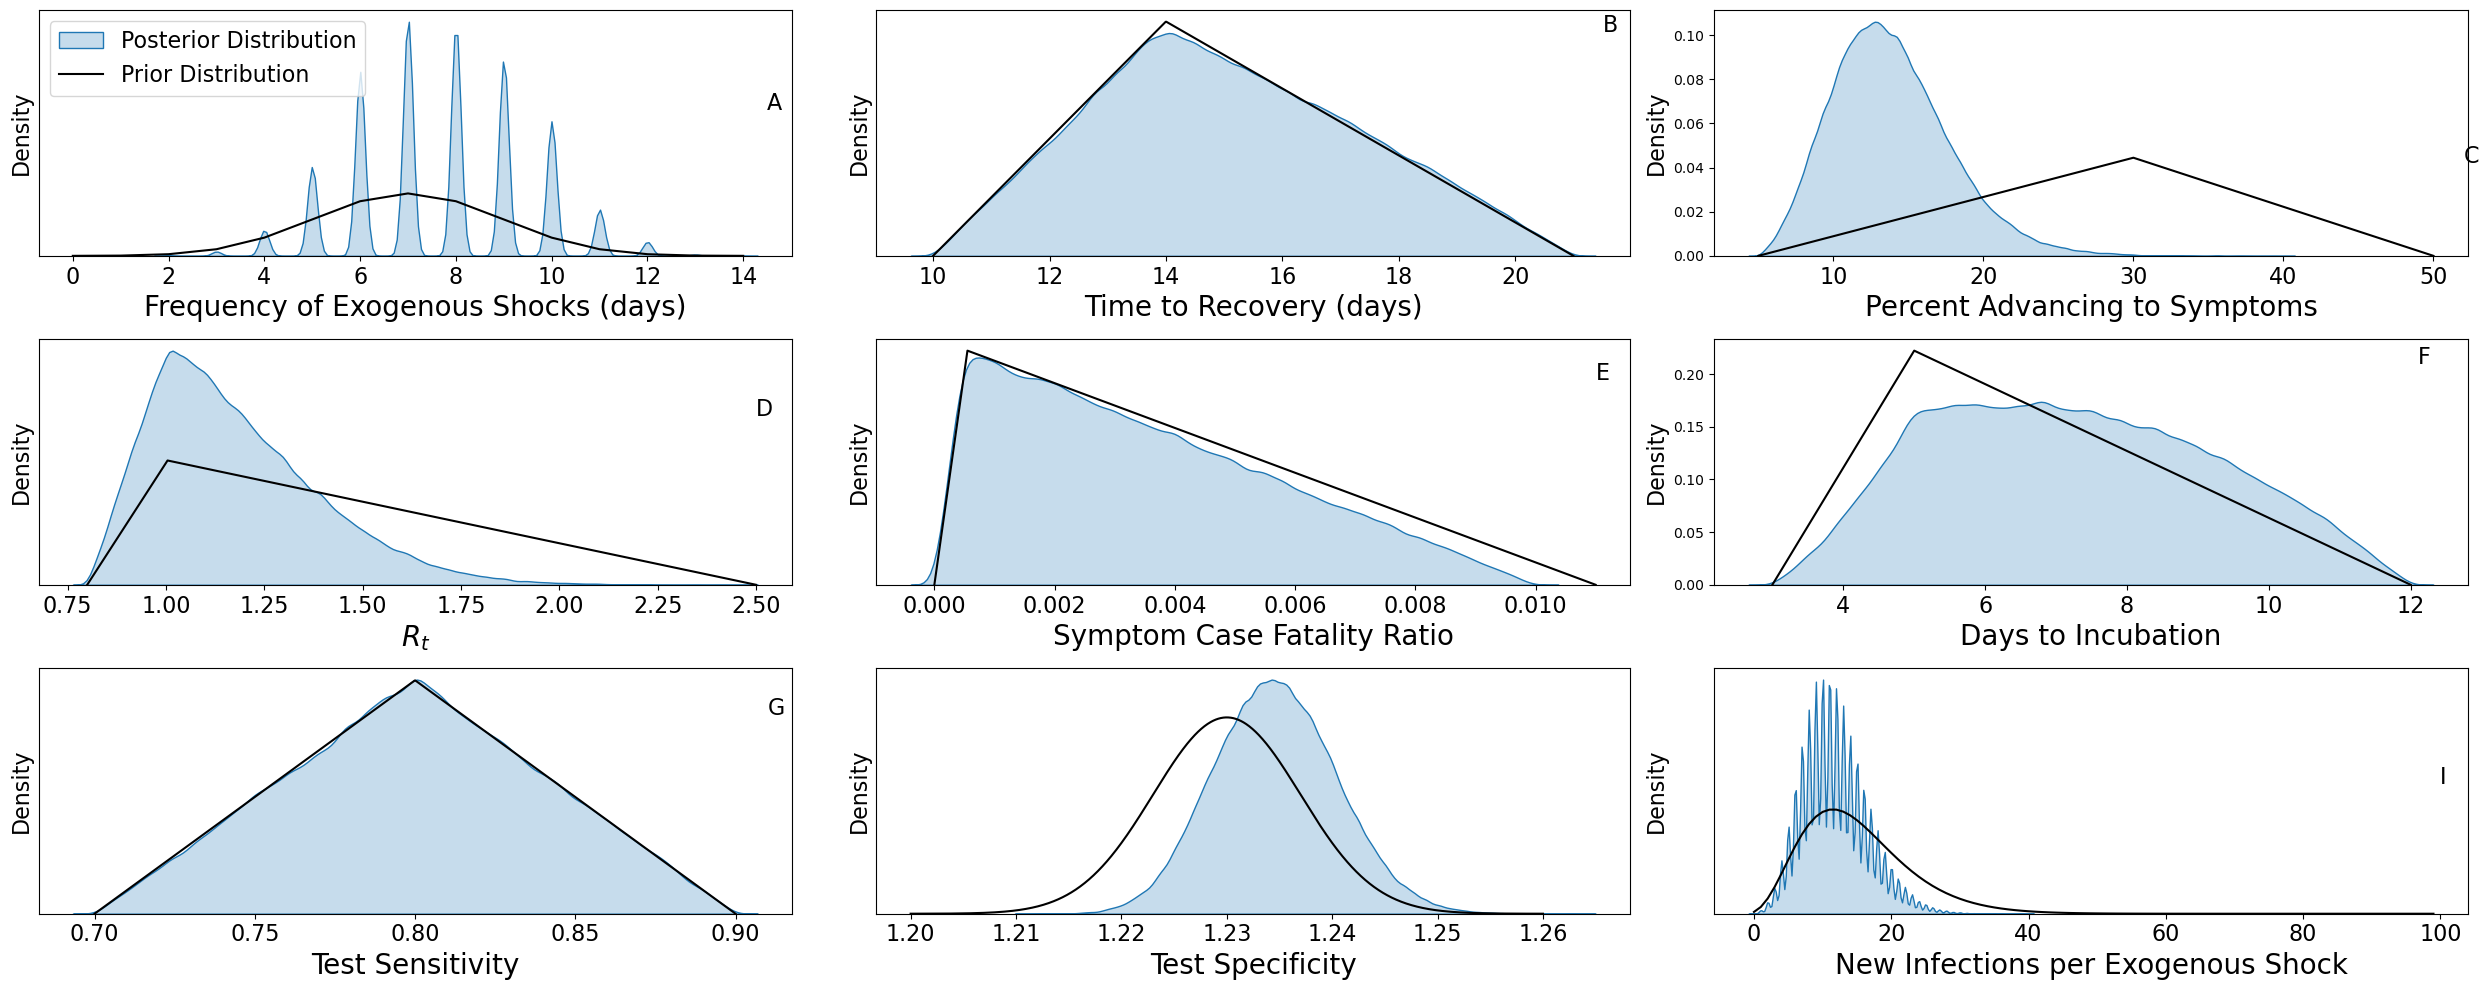

In [225]:
from scipy.stats.distributions import norm, binom, nbinom, triang, uniform, truncnorm

# Now we overlay prior distributions on new posterior distributions
fig, axs = plt.subplots(3, 3, sharex = False, sharey = False)
    
fig.set_figheight(10)
fig.set_figwidth(25)
    
plt.subplot(3, 3, 1)
sns.kdeplot(np.array(MCMC_Chain_Burn_In_F.iloc[:,0], dtype = int), fill = True)
plt.plot(np.arange(0,15), binom.pmf(np.arange(0,15),14,0.5), color='k')

if model_exper_indicator == True:
    plt.axvline(x=7, color = 'b')
    plt.axvline(x=7+CI[0], color = 'b', linestyle = 'dotted')
    plt.axvline(x=7-CI[0], color = 'b', linestyle = 'dotted')

plt.legend(['Posterior Distribution', 'Prior Distribution'], fontsize = 16, loc = 'upper left')
    # plt.xlabel('')
plt.ylabel('Density', fontsize=16)
plt.xticks(fontsize = 16)
plt.yticks([])
plt.annotate('A', (14.5, 0.49), fontsize= 16)
plt.xlabel('Frequency of Exogenous Shocks (days)', fontsize = 20)
    
plt.subplot(3, 3, 2)
sns.kdeplot(MCMC_Chain_Burn_In_F.iloc[:,1], fill = True)
plt.plot(np.linspace(10, 21, 1000), triang.pdf(np.linspace(10, 21, 1000), c = 4/11, loc = 10, scale = 11), color = 'k')

if model_exper_indicator == True:
    plt.axvline(x=14.8, color = 'b')
    plt.axvline(x=14.8+CI[1], color = 'b', linestyle = 'dotted')
    plt.axvline(x=14.8-CI[1], color = 'b', linestyle = 'dotted')

#plt.legend(['Posterior Distribution', 'Prior Distribution'], fontsize = 14)
    # plt.xlabel('')    plt.ylabel('Density', fontsize=16)
plt.xticks(fontsize = 16)
plt.ylabel('Density', fontsize=16)

plt.yticks([])
plt.annotate('B', (21.5, 0.174), fontsize= 16)

plt.xlabel('Time to Recovery (days)', fontsize = 20)
    
plt.subplot(3, 3, 3)
sns.kdeplot(MCMC_Chain_Burn_In_F.iloc[:,2], fill = True)
plt.plot(np.linspace(5, 50, 1000), triang.pdf(np.linspace(5, 50, 1000), c = 5/9, loc = 5, scale = 45), color = 'k')

if model_exper_indicator == True:
    plt.axvline(x=28.7, color = 'b')
    plt.axvline(x=28.7+CI[2], color = 'b', linestyle = 'dotted')
    plt.axvline(x=28.7-CI[2], color = 'b', linestyle = 'dotted')
 
# plt.xlabel('')
plt.ylabel('Density', fontsize=16)
plt.xticks(fontsize = 16)
# plt.yticks([])
plt.annotate('C', (52, 0.042), fontsize= 16)
plt.xlabel('Percent Advancing to Symptoms', fontsize = 20)
    
plt.subplot(3, 3, 4)
sns.kdeplot(MCMC_Chain_Burn_In_F.iloc[:,3], fill = True)
plt.plot(np.linspace(0.8, 2.5, 1000), triang.pdf(np.linspace(0.8, 2.5, 1000), c = 0.12, loc=0.8, scale=1.7), color = 'k')
# plt.plot(np.linspace(1.35, 1.4, 1000), uniform.pdf(np.linspace(1.35, 1.4, 1000), loc=1.35, scale=0.05), color = 'k')

if model_exper_indicator == True:
    plt.axvline(x=1.37, color = 'b')
    plt.axvline(x=1.37+CI[3], color = 'b', linestyle = 'dotted')
    plt.axvline(x=1.37-CI[3], color = 'b', linestyle = 'dotted')
    
    # # plt.xlabel('')
plt.ylabel('Density', fontsize=16)
plt.xticks(fontsize = 16)
plt.yticks([])
plt.annotate('D', (2.5, 1.6), fontsize= 16)

plt.xlabel('$R_t$', fontsize = 20)
    
plt.subplot(3, 3, 5)
sns.kdeplot(MCMC_Chain_Burn_In_F.iloc[:,4], fill = True)
plt.plot(np.linspace(0, 0.011, 1000), triang.pdf(np.linspace(0, 0.01, 1000), c = 0.05, loc=0, scale=0.01), color = 'k')

if model_exper_indicator == True:
    plt.axvline(x=0.0031, color = 'b')
    plt.axvline(x=0.0031+CI[4], color = 'b', linestyle = 'dotted')
    plt.axvline(x=0.0031-CI[4], color = 'b', linestyle = 'dotted')
    
    
    # # plt.xlabel('')
plt.ylabel('Density', fontsize=16)
plt.xticks(fontsize = 16)
plt.yticks([])
plt.annotate('E', (0.011, 175), fontsize= 16)

plt.xlabel('Symptom Case Fatality Ratio', fontsize = 20)
    
    
plt.subplot(3, 3, 6)
sns.kdeplot(MCMC_Chain_Burn_In_F.iloc[:,5], fill = True)
plt.plot(np.linspace(3, 12, 1000), triang.pdf(np.linspace(3, 12, 1000), c = 2/9, loc=3, scale=9), color = 'k')

if model_exper_indicator == True:
    plt.axvline(x=6.39, color = 'b')
        # # plt.xlabel('')
    plt.axvline(x=6.39+CI[5], color = 'b', linestyle = 'dotted')
    plt.axvline(x=6.39-CI[5], color = 'b', linestyle = 'dotted')

    
plt.ylabel('Density', fontsize=16)
plt.xticks(fontsize = 16)
# plt.yticks([])
plt.annotate('F', (12.1, 0.21), fontsize= 16)

plt.xlabel('Days to Incubation', fontsize = 20)
     
plt.subplot(3, 3, 7)
sns.kdeplot(MCMC_Chain_Burn_In_F.iloc[:,6], fill = True)
plt.plot(np.linspace(0.7, 0.9, 1000), triang.pdf(np.linspace(0.7, 0.9, 1000), c = 0.5, loc=0.7, scale=0.2), color = 'k')

if model_exper_indicator == True:
    plt.axvline(x=0.8, color = 'b')
    plt.axvline(x=0.8+CI[6], color = 'b', linestyle = 'dotted')
    plt.axvline(x=0.8-CI[6], color = 'b', linestyle = 'dotted')
  
    
    # # plt.xlabel('')
plt.ylabel('Density', fontsize=16)
plt.xticks(fontsize = 16)
plt.yticks([])
plt.annotate('G', (0.91, 8.5), fontsize= 16)

plt.xlabel('Test Sensitivity', fontsize = 20)
    
plt.subplot(3, 3, 8)
sns.kdeplot(MCMC_Chain_Burn_In_F.iloc[:,7], fill = True)
# plt.plot(np.linspace(0.95, 1, 1000), triang.pdf(np.linspace(0.95, 1, 1000), c =0.6,loc=0.95, scale=0.05), color = 'k')

plt.plot(np.linspace(1.2, 1.26, 1000), norm.pdf(np.linspace(1.2, 1.26, 1000),loc=1.23, scale=0.007), color = 'k')

if model_exper_indicator == True:
    plt.axvline(x=1.23, color = 'b')
    plt.axvline(x=1.23+CI[7], color = 'b', linestyle = 'dotted')
    plt.axvline(x=1.23-CI[7], color = 'b', linestyle = 'dotted')
   
    # # plt.xlabel('')
plt.ylabel('Density', fontsize=16)
plt.xticks(fontsize = 16)
plt.yticks([])
plt.annotate('H', (1, 400), fontsize= 16)

plt.xlabel('Test Specificity', fontsize = 20)

# plt.subplot(3, 3, 8)
# sns.kdeplot(MCMC_Chain_Burn_In_F.iloc[:,7], fill = True)
# plt.plot(np.linspace(0.95, 1, 1000), triang.pdf(np.linspace(0.95, 1, 1000), c =0.6,loc=0.95, scale=0.05), color = 'k')
# # plt.axvline(x=1.23, color = 'b')
#     # # plt.xlabel('')
# plt.ylabel('Density', fontsize=16)
# plt.xticks(fontsize = 16)
# plt.yticks([])
# plt.xlabel('Test Specificity', fontsize = 20)
    
plt.subplot(3, 3, 9)
sns.kdeplot(np.array(MCMC_Chain_Burn_In_F.iloc[:,8], dtype = int), fill = True)
plt.plot(np.arange(0,100), nbinom.pmf(np.arange(0,100),5,0.25), 'k')
# plt.plot(np.arange(13,15), uniform.pdf(np.arange(13,15),13, 2), 'k')

if model_exper_indicator == True:
    plt.axvline(x=14, color = 'b')
    plt.axvline(x=14+CI[8], color = 'b', linestyle = 'dotted')
    plt.axvline(x=14-CI[8], color = 'b', linestyle = 'dotted')
        
        
        # # plt.xlabel('')
plt.ylabel('Density', fontsize=16)
plt.xticks(fontsize = 16)
plt.yticks([])
plt.annotate('I', (100, 0.07), fontsize= 16)

plt.xlabel('New Infections per Exogenous Shock', fontsize = 20)

# plt.subplot(3, 3, 10)
# sns.kdeplot(MCMC_Chain_Burn_In_F.iloc[:,9], fill = True)
# plt.plot(np.arange(0,100), nbinom.pmf(np.arange(0,100),15,0.5), 'k')
# # plt.axvline(x=11, color = 'b')
#     # # plt.xlabel('')
# plt.ylabel('Density', fontsize=16)
# plt.xticks(fontsize = 16)
# plt.yticks([])
# plt.xlabel('Initially Infected', fontsize = 20)

# plt.subplot(3, 3, 11)
# sns.kdeplot(MCMC_Chain_Burn_In_F.iloc[:,10], fill = True)
# plt.plot(np.arange(0,100), binom.pmf(np.arange(0,100),100,0.2), 'k')
# # plt.axvline(x=20, color = 'b')
#     # # plt.xlabel('')
# plt.ylabel('Density', fontsize=16)
# plt.xticks(fontsize = 16)
# plt.yticks([])
# plt.xlabel('Delay', fontsize = 20)

# plt.subplot(3, 3, 12)
# sns.kdeplot(MCMC_Chain_Burn_In_F.iloc[:,11], fill = True)
# plt.plot(np.linspace(0,0.1, 1000), truncnorm.pdf(np.linspace(0,0.1, 1000),-3.33, 3.33, 0.05, 0.015), 'k')
# # plt.axvline(x=0.050, color = 'b')
# plt.ylabel('Density', fontsize=16)
# plt.xticks(fontsize = 16)
# plt.yticks([])
# plt.xlabel('Non-compliance', fontsize = 20)


fig.tight_layout()
fig.align_labels()
plt.show()
    

In [226]:
#sns.pairplot(MCMC_Chain_Burn_In_F)

/Users/meghanchilds/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'Initially Infected')

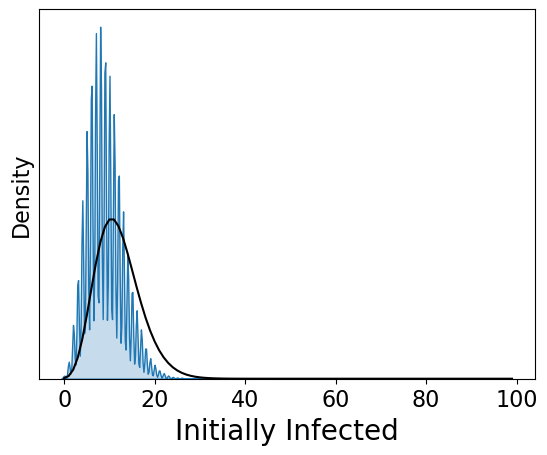

In [227]:
# # plt.subplot(3, 3, 10)
sns.kdeplot(MCMC_Chain_Burn_In_F.iloc[:,9], fill = True)
plt.plot(np.arange(0,100), nbinom.pmf(np.arange(0,100),12,0.5), 'k')
# plt.axvline(x=11, color = 'b')
    # # plt.xlabel('')
plt.ylabel('Density', fontsize=16)
plt.xticks(fontsize = 16)
plt.yticks([])
plt.xlabel('Initially Infected', fontsize = 20)

/Users/meghanchilds/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'Initial Isolation Population')

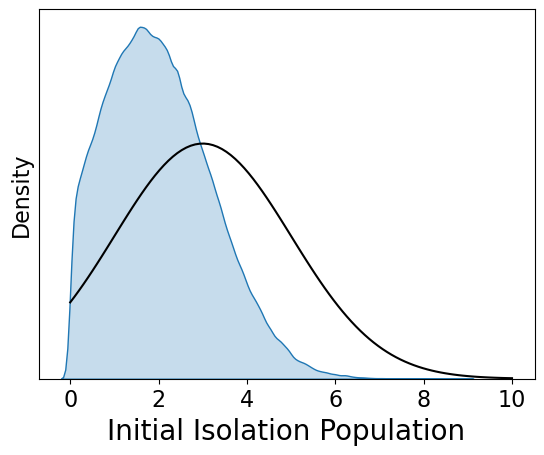

In [228]:
# # plt.subplot(3, 3, 10)
sns.kdeplot(MCMC_Chain_Burn_In_F.iloc[:,10], fill = True)
plt.plot(np.linspace(0,10,100), truncnorm.pdf(np.linspace(0,10,100),a = -1.5,b = 3.5,loc = 3,scale = 2), 'k')
# plt.axvline(x=11, color = 'b')
    # # plt.xlabel('')
plt.ylabel('Density', fontsize=16)
plt.xticks(fontsize = 16)
plt.yticks([])
plt.xlabel('Initial Isolation Population', fontsize = 20)

/Users/meghanchilds/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meghanchilds/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'Reparameterized Test Specificity')

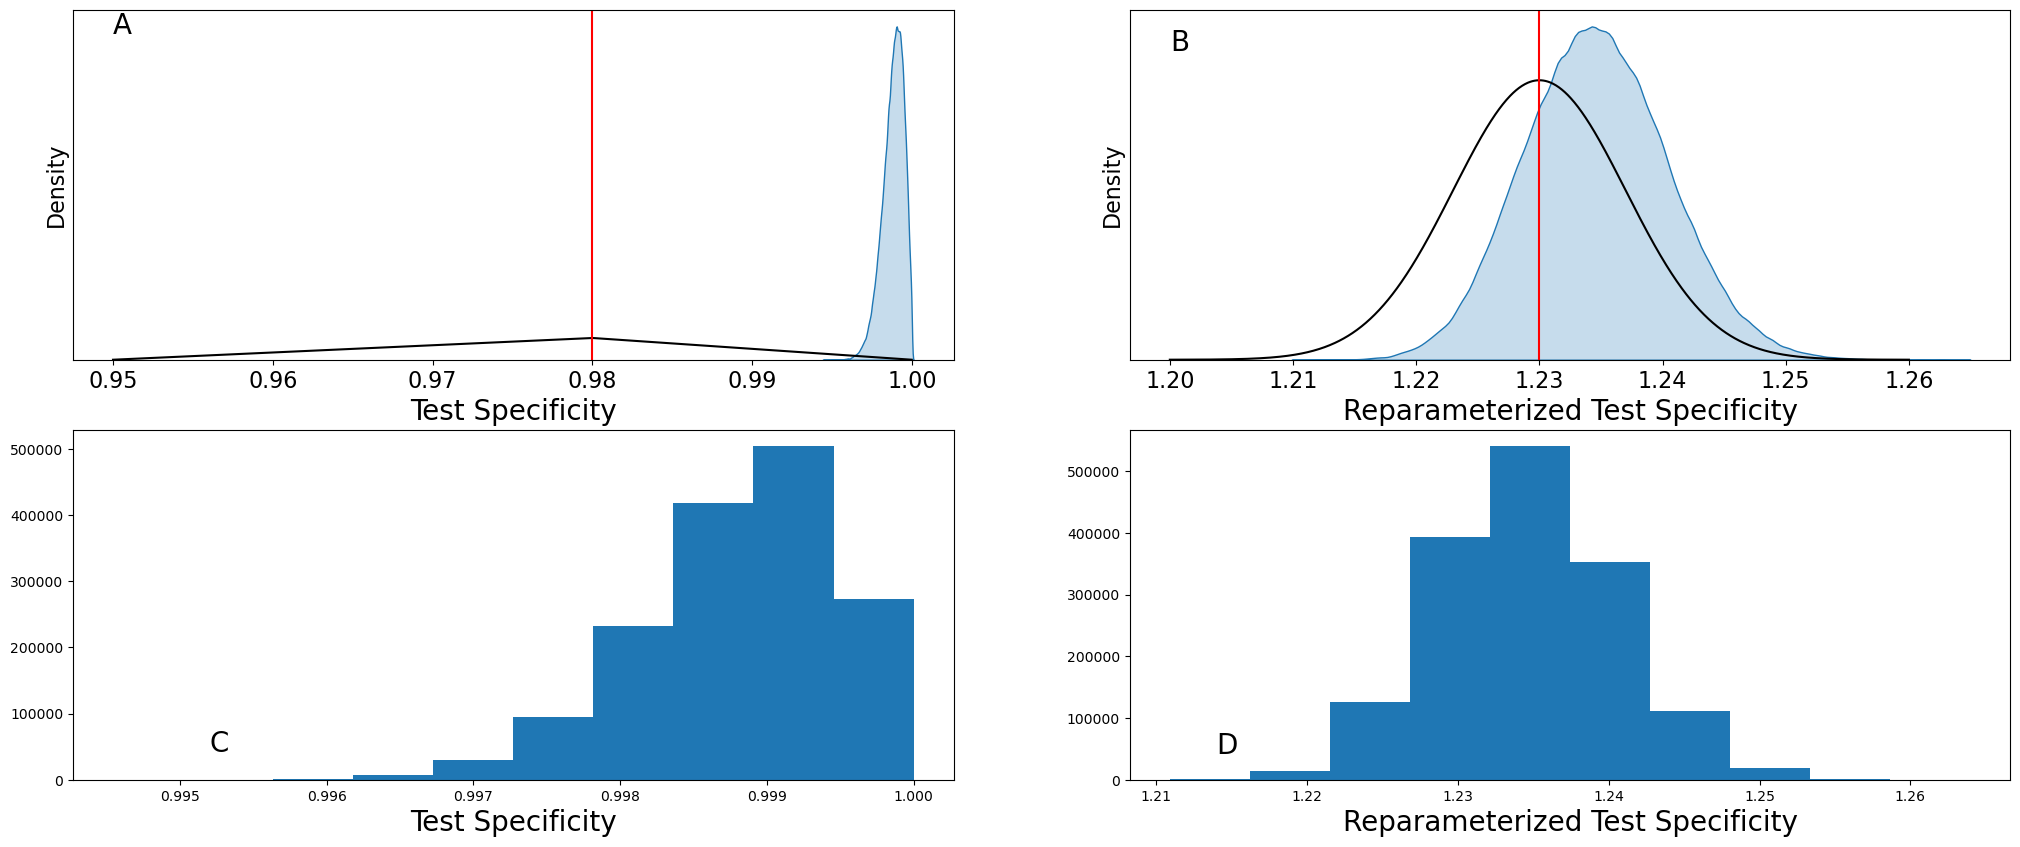

In [229]:
fig, axs = plt.subplots(2, 2, sharex = False, sharey = False)
    
fig.set_figheight(10)
fig.set_figwidth(25)
                 
plt.subplot(2, 2, 1)
sns.kdeplot(np.sin(MCMC_Chain_Burn_In_F.iloc[:,7]**2), fill = True)
plt.plot(np.linspace(0.95, 1, 1000), triang.pdf(np.linspace(0.95, 1, 1000), c =0.6,loc=0.95, scale=0.05), color = 'k')
plt.axvline(x=0.98, color = 'r')
    # # plt.xlabel('')
plt.ylabel('Density', fontsize=16)
plt.xticks(fontsize = 16)
plt.yticks([])
plt.annotate('A', (0.95,600), fontsize = 20)
plt.xlabel('Test Specificity', fontsize = 20)

plt.subplot(2, 2, 2)
sns.kdeplot(MCMC_Chain_Burn_In_F.iloc[:,7], fill = True)
plt.plot(np.linspace(1.2, 1.26, 1000), norm.pdf(np.linspace(1.2, 1.26, 1000),loc=1.23, scale=0.007), color = 'k')
plt.axvline(x=1.23, color = 'r')
    # # plt.xlabel('')
plt.annotate('B', (1.20,63), fontsize = 20)
plt.ylabel('Density', fontsize=16)
plt.xticks(fontsize = 16)
plt.yticks([])
plt.xlabel('Reparameterized Test Specificity', fontsize = 20)

plt.subplot(2, 2, 3)
plt.hist(np.sin(MCMC_Chain_Burn_In_F.iloc[:,7]**2))
plt.annotate('C', (0.9952,43000), fontsize = 20)
plt.xlabel('Test Specificity', fontsize = 20)

plt.subplot(2, 2, 4)
plt.hist(MCMC_Chain_Burn_In_F.iloc[:,7])
plt.annotate('D', (1.214,42000), fontsize = 20)
plt.xlabel('Reparameterized Test Specificity', fontsize = 20)










In [33]:
# sns.pairplot(MCMC_Chain_Burn_In_F.iloc[:, :12])

Now we want to randomly sample from these converged set instead of using all of them (This is the thinning we do). To do this we first need to set up some variables for calculations. This includes setting how many samples we are randomly sampling from the large DataFrame of converged parameter sets (num_samples_F) the_F denotes this is from the MCMC run with the fall data. Then we show how many parameters we have (num_params_F). Then we calcualte the highest index we have which will be the length of one of the columsn minus 1 (highest_index_F) we minus 1 because indexing starts at 0 so the index label will be that length minus one. Then using the highest index as the upper bound we make a list of all the indices (all_indices_F). Then finally we sample the number of samples we want from the indices. We sample the indices because we want to pull FULL parameter sets so we pick the indices for which we pull those full parameter sets from.

In [230]:
# FALL 2020
# Now we randomly sample the burned in params
# We sample by indices to make sure we get full sets of params
# This ensures we do not loose correlation
# First we need to get a vector of indices to pull from the dataframe

num_samples_F = 10000 # number of samples we want to randomly pull
num_params_F = 11 # number of parameters we have
highest_index_F = len(MCMC_Chain_Burn_In_F.iloc[:,0]) - 1

all_indices_F = [ i for i in range(highest_index_F)] # makes an list of all indices
sample_indices_F = sample(all_indices_F, num_samples_F)


Now we use that set of indices to full those full sets of parameters and store them in a numpy array. Each row is a full set of parameters.

In [231]:
# FALL 2020
# Now we use the sample indices to pull those indices from the dataframe
analysis_samples_F = np.zeros((num_samples_F, num_params_F + 2))
for i in range (num_samples_F):
    analysis_samples_F[i,:] = MCMC_Chain_Burn_In_F.iloc[sample_indices_F[i],:]


We again make sure our frequency of exogenous shocks and new infections per shock parameters are integers as that is the form the model takes and the form that the log_prior uses

In [232]:
# FALL 2020
# Change Freq_Es, new infections per shock, and initially infected to integers
type(analysis_samples_F)
analysis_samples_F[:,0]=np.array(analysis_samples_F[:,0], dtype = int)
analysis_samples_F[:,8]=np.array(analysis_samples_F[:,8], dtype = int)
analysis_samples_F[:,9]=np.array(analysis_samples_F[:,9], dtype = int)
# analysis_samples_F[:,10]=np.array(analysis_samples_F[:,10], dtype = int)

In [233]:
analysis_samples_df = pd.DataFrame(analysis_samples_F, columns = ['Freq Es', 'Time to Recovery',  'Percent Advancing', 'Rt' ,'Symptom Case Fatality', 'Days to Incubation', 'Test Sensitivity', 'Test Specificity', 'New Infect', 'Init Infect', 'Initial Iso', 'Iter', 'Rand Seed'])
analysis_samples_df

,Freq Es,Time to Recovery,Percent Advancing,Rt,Symptom Case Fatality,Days to Incubation,Test Sensitivity,Test Specificity,New Infect,Init Infect,Initial Iso,Iter,Rand Seed
0,5.0,16.098965,16.045395,1.062376,0.003694,7.881015,0.741553,1.222893,5.0,8.0,0.798757,233987.0,277.0
1,7.0,13.204808,18.289913,0.980453,0.002659,7.326761,0.767882,1.227507,12.0,4.0,0.666931,316589.0,13.0
2,10.0,17.032666,10.089127,1.015525,0.001322,4.902090,0.781645,1.243928,17.0,13.0,1.294711,231896.0,855.0
3,11.0,16.778759,11.704455,1.139026,0.002729,8.682039,0.779306,1.228794,14.0,19.0,0.666696,372484.0,13.0
4,9.0,17.147878,14.137576,1.153945,0.004417,6.075182,0.814574,1.237857,13.0,10.0,2.969902,309950.0,855.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9.0,13.500403,9.746570,1.022353,0.006562,8.736041,0.756800,1.229822,17.0,5.0,3.514126,295316.0,277.0
9996,7.0,14.652780,11.914061,1.133669,0.006743,7.654196,0.733191,1.227651,7.0,4.0,1.608912,362310.0,277.0
9997,7.0,16.163128,13.119823,1.010685,0.003138,8.640637,0.885375,1.232273,15.0,12.0,1.515588,195375.0,974.0
9998,7.0,13.816181,20.258962,0.917558,0.003942,6.879862,0.749078,1.222473,7.0,10.0,0.523364,238057.0,855.0


And then we store these samples in a DataFrame to be used to run the model with. When we run the model with these sets it means we are running the model with calibrated samples.

In [234]:
analysis_samples_df = pd.DataFrame(analysis_samples_F, columns = ['Freq Es', 'Time to Recovery',  'Percent Advancing', 'Rt' ,'Symptom Case Fatality', 'Days to Incubation', 'Test Sensitivity', 'Test Specificity', 'New Infect', 'Init Infect', 'Initial Iso', 'Iter', 'Rand Seed'])
analysis_samples_df.to_csv(r'/Users/meghanchilds/Desktop/Dissertation_Research/COVID-19-Model-Formal-Calibration/MCMC CSV Files/Calibrated Parameters/Fall_Samples_For_Analysis_FLF_1000_sims_new_std_weight_LL_multiply_4_sep_24.csv')


Then we print to visually check the DataFrame.

In [163]:
analysis_samples_df

,Freq Es,Time to Recovery,Percent Advancing,Rt,Symptom Case Fatality,Days to Incubation,Test Sensitivity,Test Specificity,New Infect,Init Infect,Initial Iso,Iter,Rand Seed
0,11.0,17.919503,10.382535,1.406476,0.007785,5.664979,0.769985,1.231553,10.0,15.0,1.601469,158277.0,379.0
1,9.0,13.280190,11.670056,1.659497,0.007664,7.391168,0.810907,1.238100,10.0,7.0,1.085686,124344.0,203.0
2,8.0,12.142009,10.843432,1.128705,0.004022,10.669401,0.847111,1.231385,16.0,5.0,0.820871,216275.0,725.0
3,10.0,18.807700,15.491471,1.295773,0.004100,7.838105,0.807751,1.232766,15.0,7.0,1.214756,95051.0,443.0
4,8.0,12.153332,11.546552,1.420458,0.001555,8.309952,0.744533,1.238869,10.0,11.0,0.601880,338182.0,725.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,8.0,15.240355,9.947896,1.372230,0.000644,5.551480,0.797569,1.233979,8.0,13.0,1.310149,130987.0,379.0
9996,8.0,17.581023,16.121232,1.200505,0.008087,7.829960,0.748682,1.230239,9.0,8.0,0.233709,351889.0,443.0
9997,6.0,12.499513,12.337279,1.100604,0.001958,9.629255,0.778321,1.229182,12.0,9.0,2.790106,245976.0,725.0
9998,7.0,13.515314,17.242674,1.353102,0.001183,9.671869,0.825709,1.242163,11.0,3.0,3.759505,25246.0,725.0


## Finding the Maximum a Posteriori Simulation
Then we can map this simulation over our model-to-data comparison and see what that looks like. To find this simulation we want to find the MAP simulation from our burn in period above and we need the log posterior scores to do so. 

In [260]:
log_post_1 = pd.read_csv('/Users/meghanchilds/Desktop/Dissertation_Research/COVID-19-Model-Formal-Calibration/MCMC CSV Files/std version of ll weighting (multiplied std by 4) sept 24/MCMC_Log_Post_Fall_Data_All_Params_100_iters_rit_data_stochastic_new_ll_adapted_binom_initial_iso_fixed_new_weighting_4_times_[13].csv', names=['Log Post Score'])
log_post_2 = pd.read_csv('/Users/meghanchilds/Desktop/Dissertation_Research/COVID-19-Model-Formal-Calibration/MCMC CSV Files/std version of ll weighting (multiplied std by 4) sept 24/MCMC_Log_Post_Fall_Data_All_Params_100_iters_rit_data_stochastic_new_ll_adapted_binom_initial_iso_fixed_new_weighting_4_times_[277].csv', names=['Log Post Score'])
log_post_3 = pd.read_csv('/Users/meghanchilds/Desktop/Dissertation_Research/COVID-19-Model-Formal-Calibration/MCMC CSV Files/std version of ll weighting (multiplied std by 4) sept 24/MCMC_Log_Post_Fall_Data_All_Params_100_iters_rit_data_stochastic_new_ll_adapted_binom_initial_iso_fixed_new_weighting_4_times_[855].csv', names=['Log Post Score'])
log_post_4 = pd.read_csv('/Users/meghanchilds/Desktop/Dissertation_Research/COVID-19-Model-Formal-Calibration/MCMC CSV Files/std version of ll weighting (multiplied std by 4) sept 24/MCMC_Log_Post_Fall_Data_All_Params_100_iters_rit_data_stochastic_new_ll_adapted_binom_initial_iso_fixed_new_weighting_4_times_[974].csv', names=['Log Post Score'])
log_post_1


,Log Post Score
0,-335.814631
1,-326.358927
2,-324.192261
3,-314.213938
4,-314.213938
...,...
39995,-281.598759
39996,-281.598759
39997,-281.598759
39998,-281.598759


In [261]:
log_post_1.reset_index(inplace=True)
log_post_2.reset_index(inplace=True)
log_post_3.reset_index(inplace=True)
log_post_4.reset_index(inplace=True)


In [262]:
log_post_2

,index,Log Post Score
0,0,-405.793493
1,1,-405.793493
2,2,-405.140536
3,3,-405.140536
4,4,-381.159666
...,...,...
399995,39995,-281.815870
399996,39996,-281.815870
399997,39997,-281.815870
399998,39998,-281.815870


In [263]:
del log_post_1['index']
del log_post_2['index']
del log_post_3['index']
del log_post_4['index']


In [264]:
log_post_1.isnull().values.any()


False

In [265]:
log_post_2.isnull().values.any()


False

In [266]:
log_post_3.isnull().values.any()


False

In [267]:
log_post_4.isnull().values.any()


False

### Isolate the Log Posterior Scores for the Burned in Samples

In [268]:
convergence_threshold

10000

In [269]:
log_post_1_burn_in = log_post_1[convergence_threshold:]
log_post_2_burn_in = log_post_2[convergence_threshold:]
log_post_3_burn_in = log_post_3[convergence_threshold:]
log_post_4_burn_in = log_post_4[convergence_threshold:]

log_post_4_burn_in

,Log Post Score
10000,-281.069847
10001,-281.710778
10002,-281.710778
10003,-280.729030
10004,-280.729030
...,...
399995,-283.986599
399996,-283.986599
399997,-283.986599
399998,-283.986599


### Isolate the Log Post Scores Corresponding to the randomly sampled 10,000 parameters.
We will need to do this in four parts since we have four chains so first we want to isolate each of the four chains by their random seed.

In [270]:
anaylsis_subset_1 = analysis_samples_df[analysis_samples_df['Rand Seed'] == 13.0]
anaylsis_subset_2 = analysis_samples_df[analysis_samples_df['Rand Seed'] == 277.0]
anaylsis_subset_3 = analysis_samples_df[analysis_samples_df['Rand Seed'] == 855.0]
anaylsis_subset_4 = analysis_samples_df[analysis_samples_df['Rand Seed'] == 974.0]

anaylsis_subset_1


,Freq Es,Time to Recovery,Percent Advancing,Rt,Symptom Case Fatality,Days to Incubation,Test Sensitivity,Test Specificity,New Infect,Init Infect,Initial Iso,Iter,Rand Seed
1,7.0,13.204808,18.289913,0.980453,0.002659,7.326761,0.767882,1.227507,12.0,4.0,0.666931,316589.0,13.0
3,11.0,16.778759,11.704455,1.139026,0.002729,8.682039,0.779306,1.228794,14.0,19.0,0.666696,372484.0,13.0
14,8.0,14.767074,19.303243,0.938949,0.000874,5.959855,0.872997,1.235047,11.0,10.0,0.369942,45517.0,13.0
15,9.0,16.504459,12.617279,1.255333,0.002719,10.419982,0.810951,1.234310,19.0,10.0,2.116566,224417.0,13.0
24,7.0,13.240651,11.587693,1.325398,0.002928,7.201167,0.722845,1.231267,6.0,8.0,3.141261,170521.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,8.0,16.078355,16.147243,1.087772,0.002062,8.026407,0.837825,1.220555,10.0,8.0,1.030139,377770.0,13.0
9986,7.0,13.033404,14.193524,1.263109,0.002123,4.876150,0.789305,1.233767,7.0,11.0,1.706850,360165.0,13.0
9989,7.0,17.916289,12.488243,0.897213,0.003035,5.103194,0.763822,1.240479,14.0,4.0,1.979972,137339.0,13.0
9994,11.0,13.528635,11.465826,0.927704,0.001771,4.703705,0.781380,1.240819,20.0,14.0,0.985451,16300.0,13.0


Then for each of the chains we pull the iteration numbers included in the 10,000 samples. 

In [271]:
iter_subset_1 = anaylsis_subset_1['Iter']
iter_subset_2 = anaylsis_subset_2['Iter']
iter_subset_3 = anaylsis_subset_3['Iter']
iter_subset_4 = anaylsis_subset_4['Iter']
iter_subset_1


1       316589.0
3       372484.0
14       45517.0
15      224417.0
24      170521.0
          ...   
9985    377770.0
9986    360165.0
9989    137339.0
9994     16300.0
9999     40037.0
Name: Iter, Length: 2564, dtype: float64

Then we reset their indices so we can loop over them.

In [272]:
iter_subset_1 = iter_subset_1.reset_index()
iter_subset_2 = iter_subset_2.reset_index()
iter_subset_3 = iter_subset_3.reset_index()
iter_subset_4 = iter_subset_4.reset_index()




In [273]:
iter_subset_1

,index,Iter
0,1,316589.0
1,3,372484.0
2,14,45517.0
3,15,224417.0
4,24,170521.0
...,...,...
2559,9985,377770.0
2560,9986,360165.0
2561,9989,137339.0
2562,9994,16300.0


And delete the extra column we do not need.

In [274]:
del iter_subset_1['index']
del iter_subset_2['index']
del iter_subset_3['index']
del iter_subset_4['index']


In [275]:
iter_subset_1

,Iter
0,316589.0
1,372484.0
2,45517.0
3,224417.0
4,170521.0
...,...
2559,377770.0
2560,360165.0
2561,137339.0
2562,16300.0


In [276]:
anaylsis_subset_3

,Freq Es,Time to Recovery,Percent Advancing,Rt,Symptom Case Fatality,Days to Incubation,Test Sensitivity,Test Specificity,New Infect,Init Infect,Initial Iso,Iter,Rand Seed
2,10.0,17.032666,10.089127,1.015525,0.001322,4.902090,0.781645,1.243928,17.0,13.0,1.294711,231896.0,855.0
4,9.0,17.147878,14.137576,1.153945,0.004417,6.075182,0.814574,1.237857,13.0,10.0,2.969902,309950.0,855.0
5,8.0,16.881260,8.942731,1.740027,0.001716,8.635402,0.786483,1.242588,8.0,7.0,1.480913,32957.0,855.0
6,9.0,15.022381,12.284020,1.181645,0.006640,6.447237,0.741160,1.234817,12.0,8.0,1.251867,306161.0,855.0
11,9.0,12.441642,13.954852,1.168353,0.001854,6.829073,0.841718,1.237070,11.0,10.0,0.519430,154021.0,855.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9983,10.0,19.444154,16.272489,1.168893,0.003762,6.274143,0.758049,1.233312,14.0,4.0,2.349611,24256.0,855.0
9984,7.0,13.005794,16.343735,1.022152,0.003544,7.337923,0.858215,1.231967,13.0,8.0,1.116223,88214.0,855.0
9987,6.0,12.251762,10.456176,1.182829,0.002339,3.477079,0.845962,1.231595,7.0,13.0,0.624393,96346.0,855.0
9993,7.0,12.585995,12.523534,1.120044,0.005094,8.374588,0.800500,1.232647,12.0,18.0,2.015234,171325.0,855.0


In [277]:
# iter_subset_1.reset_index( drop = True, inplace=True)
# iter_subset_2.reset_index( drop = True, inplace=True)
# iter_subset_3.reset_index( drop = True, inplace=True)
# iter_subset_4.reset_index( drop = True, inplace=True)


Then we take these indices and we isolate from each burned in sample of log posteriors the one that correspond to those iteration numbers. Which means the log post from that iteration of the markoc chain monte carlo run.

In [278]:
def log_post_isolation(iter_subset, log_post_burn_in):
    log_post_burn_in_subset = np.zeros(len(iter_subset))
    
    for i in range(len(iter_subset)):
        iters = int(iter_subset.loc[i])
       
        log_post_burn_in_subset[i] = log_post_burn_in.loc[iters]
#         print(log_post_burn_in_subset[i], iters)
            
    return(log_post_burn_in_subset)
       

We do this for each chain seperately

In [279]:
log_post_burn_in_subset_1 = log_post_isolation(iter_subset_1, log_post_1_burn_in)
log_post_burn_in_subset_2 = log_post_isolation(iter_subset_2, log_post_2_burn_in)
log_post_burn_in_subset_3 = log_post_isolation(iter_subset_3, log_post_3_burn_in)
log_post_burn_in_subset_4 = log_post_isolation(iter_subset_4, log_post_4_burn_in)


/var/folders/7d/pq2z223x78gfz9npz67q9vqw0000gn/T/ipykernel_50187/3189280727.py:5: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  iters = int(iter_subset.loc[i])
/var/folders/7d/pq2z223x78gfz9npz67q9vqw0000gn/T/ipykernel_50187/3189280727.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  log_post_burn_in_subset[i] = log_post_burn_in.loc[iters]


In [280]:
log_post_burn_in_subset_3

array([-281.0483501 , -279.89906687, -282.80869604, ..., -284.07763649,
       -281.18976107, -283.24686481])

In [281]:
iter_subset_1

,Iter
0,316589.0
1,372484.0
2,45517.0
3,224417.0
4,170521.0
...,...
2559,377770.0
2560,360165.0
2561,137339.0
2562,16300.0


### Finding Maximum Log Posterior Scores

In [282]:
pd.DataFrame(np.exp(log_post_burn_in_subset_1))

,0
0,1.449253e-122
1,3.153363e-124
2,1.110671e-122
3,1.020730e-122
4,1.003906e-123
...,...
2559,2.071823e-123
2560,9.888690e-122
2561,9.018842e-123
2562,2.430737e-123


Now we have the log posterior scores from runs that were chosen for the calibrated model run and we want to find the maximum of each, including the location of the maximum.

In [283]:
max_1 = max(np.exp(log_post_burn_in_subset_1))
max_1_id = pd.DataFrame((np.exp(log_post_burn_in_subset_1))).idxmax()
max_2 = max(np.exp(log_post_burn_in_subset_2))
max_2_id = pd.DataFrame((np.exp(log_post_burn_in_subset_2))).idxmax()
max_3 = max(np.exp(log_post_burn_in_subset_3))
max_3_id = pd.DataFrame((np.exp(log_post_burn_in_subset_3))).idxmax()
max_4 = max(np.exp(log_post_burn_in_subset_4))
max_4_id = pd.DataFrame((np.exp(log_post_burn_in_subset_4))).idxmax()


print('1:', max_1,'2:', max_2,'3:',max_3 , '4:',max_4)

1: 2.07430243265854e-121 2: 2.147869808732765e-121 3: 1.693029651108974e-121 4: 1.8512149368980096e-121


Then we want to find the max of the maxes.

In [284]:
max_1_2 = max((max_1, max_2))
max_3_4 = max((max_3, max_4))

print(max_1_2, max_3_4)

max_all =max((max_1_2, max_3_4))

print(max_all)

2.147869808732765e-121 1.8512149368980096e-121
2.147869808732765e-121


Then we need to isolate what iteration this corresponds to. Since we pulled the log posterior values in order of the iterations in each of the itersubset. The location of the maximum value in the log_post_burn_in_subset values will be the same as the location of its corresponding index.

In [285]:
MAP_iter = iter_subset_2.loc[max_2_id]
MAP_iter

,Iter
1001,135164.0


In [286]:
analysis_samples_df[analysis_samples_df['Iter'] == 135164.0]

,Freq Es,Time to Recovery,Percent Advancing,Rt,Symptom Case Fatality,Days to Incubation,Test Sensitivity,Test Specificity,New Infect,Init Infect,Initial Iso,Iter,Rand Seed
4081,7.0,14.581714,13.594663,1.112167,0.002961,5.885066,0.781146,1.236987,11.0,11.0,2.411757,135164.0,277.0


## Spring Semester Data

All the work we did above was for the fall. Now we do the same for the spring semester.

First we read in the CSV files we need, one for each chain. Will likely need to change path names every time. These first chains should be the ones run with fall data.

In [18]:
# SPRING 2021
# 150,000 interation chains
# Reads in CSVs

MCMC_chain_1_150_S = pd.read_csv('/Users/meghanchilds/Desktop/COVID19 Research/Scripts to Run Model/Spring_All_Data_150000_iter_MCMC_chain_REDO_rand_seed__FIRST_REDO[664].csv')
MCMC_chain_2_150_S = pd.read_csv('/Users/meghanchilds/Desktop/COVID19 Research/Scripts to Run Model/Spring_All_Data_150000_iter_MCMC_chain_REDO_rand_seed__SECOND_REDO[664].csv')
# MCMC_chain_3_150 = pd.read_csv('/Users/meghanchilds/Desktop/MCMC CSVs/150000 iterations/MCMC_chain_rand_seed_[672].csv')
# MCMC_chain_4_150 = pd.read_csv('/Users/meghanchilds/Desktop/MCMC CSVs/150000 iterations/MCMC_chain_rand_seed_[696].csv')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/meghanchilds/Desktop/COVID19 Research/Scripts to Run Model/Spring_All_Data_150000_iter_MCMC_chain_REDO_rand_seed__FIRST_REDO[664].csv'

Then we name the columns and delete the column with the iteration numbers as we will not need them for analysis.

In [ ]:
# SPRING 2021

MCMC_chain_1_150_S.columns=['Iter', 'Frequency of ES', 'Time to Recovery', 'Percent Advancing', ' Rt', 'Symptom Case Fatality','Days to Incubation', 'Test Sensitivity', 'Test Specificity', 'New Infections per Shock']
del MCMC_chain_1_150_S['Iter']
MCMC_chain_1_150_S

MCMC_chain_2_150_S.columns=['Iter', 'Frequency of ES', 'Time to Recovery', 'Percent Advancing', ' Rt', 'Symptom Case Fatality','Days to Incubation', 'Test Sensitivity', 'Test Specificity', 'New Infections per Shock']
del MCMC_chain_2_150_S['Iter']
#MCMC_chain_2_150

# MCMC_chain_3_150.columns=['Iter', 'Time to Recovery', 'Percent Advancing', ' Rt',  'Days to Incubation', 'Test Sensitivity', 'Test Specificity']
# del MCMC_chain_3_150['Iter']
# MCMC_chain_3_150

# MCMC_chain_4_150.columns=['Iter', 'Time to Recovery', 'Percent Advancing', ' Rt',  'Days to Incubation', 'Test Sensitivity', 'Test Specificity']
# del MCMC_chain_4_150['Iter']
# MCMC_chain_4_150

Then we print the DataFrame to visually check.

In [ ]:
MCMC_chain_1_150_S

Then we need the row length and column length for further calculations.


In [ ]:
row_length_S = len(MCMC_chain_1_150_S.iloc[:,0]) # finds row length for ease and general indexing 
col_length_S = len(MCMC_chain_1_150_S.iloc[0, :]) # finds col length for ease and general indexing 

Then we use our convergence threshold and select past that threshold to be our burned in sets. We chop off the sets until that threshold as they are from the burn in period. You will use the convergence threshold you determined in the first script.

In [ ]:
# Lets set that threshold for which we are hoping it converges before we change this until the parameter sets converge
convergence_threshold = 119999

In [ ]:
# SPRING 2021
# Isolate burned in chains
# Spring is burned in by iteration 99,998 so we start at iteration 99,999

MCMC_chain_1_S_Burn_In = MCMC_chain_1_150_S.iloc[convergence_threshold:row_length_S+1,: ] # starts where we know data is burned in
len(MCMC_chain_1_S_Burn_In) # checks to make sure we have the length chain we want

MCMC_chain_2_S_Burn_In = MCMC_chain_2_150_S.iloc[convergence_threshold:row_length_S+1,: ] # starts where we know data is burned in
len(MCMC_chain_2_S_Burn_In) # checks to make sure we have the length chain we want

Now we take all the burned in sets from all chains and combine them into one large set of converged parameter sets. In our case we store them all in a large DataFrame.

In [ ]:
# SPRING 2021
# Combine burned in samples into one dataframe
# And reset indices to start at 0

MCMC_Chain_Burn_In_S = pd.concat((MCMC_chain_1_S_Burn_In, MCMC_chain_2_S_Burn_In), axis = 0, ignore_index = True)
MCMC_Chain_Burn_In_S

Now we want to randomly sample from these converged set instead of using all of them (This is the thinning we do). To do this we first need to set up some variables for calculations. This includes setting how many samples we are randomly sampling from the large DataFrame of converged parameter sets (num_samples_S) the_S denotes this is from the MCMC run with the spring data. Then we show how many parameters we have (num_params_S). Then we calcualte the highest index we have which will be the length of one of the columns minus 1 (highest_index_S) we minus 1 because indexing starts at 0 so the index label will be that length minus one. Then using the highest index as the upper bound we make a list of all the indices (all_indices_S). Then finally we sample the number of samples we want from the indices. We sample the indices because we want to pull FULL parameter sets so we pick the indices for which we pull those full parameter sets from.

In [ ]:
# SPRING 2021
# Now we randomly sample the burned in params
# We sample by indices to make sure we get full sets of params
# This ensures we do not loose correlation
# First we need to get a vector of indices to pull from the dataframe

num_samples_S = 10000 # number of samples we want to randomly pull
num_params_S = 9 # number of parameters we have
highest_index_S = len(MCMC_Chain_Burn_In_S.iloc[:,0]) - 1

all_indices_S=[ i for i in range(highest_index_S)] # makes an list of all indices
sample_indices_S=sample(all_indices_S, num_samples_S)


Now we use that set of indices to full those full sets of parameters and store them in a numpy array. Each row is a full set of parameters.

In [ ]:
# SPRING 2021
# Now we use the sample indices to pull those indices from the dataframe
analysis_samples_S = np.zeros((num_samples_S, num_params_S))
for i in range (num_samples_S):
    analysis_samples_S[i,:] = MCMC_Chain_Burn_In_S.iloc[sample_indices_S[i],:]

We again make sure our frequency of exogenous shocks and new infections per shock parameters are integers as that is the form the model takes and the form that the log_prior uses

In [ ]:
# FALL 2020
# Change Freq_Es and new infections per shock to integers
type(analysis_samples_S)
analysis_samples_S[:,0]=np.array(analysis_samples_S[:,0], dtype = int)
analysis_samples_S[:,8]=np.array(analysis_samples_S[:,8], dtype = int)

And then we store these samples in a DataFrame to be used to run the model with. When we run the model with these sets it means we are running the model with calibrated samples.

In [ ]:
analysis_samples_S_df = pd.DataFrame(analysis_samples_S, columns = ['Frequency of ES', 'Time to Recovery', 'Percent Advancing', ' Rt', 'Symptom Case Fatality','Days to Incubation', 'Test Sensitivity', 'Test Specificity', 'New Infections per Shock'])
analysis_samples_S_df.to_csv(r'/Users/meghanchilds/Desktop/Spring_Samples_For_Analysis__TC_FIX_REDO.csv')

Then we print to visually check the DataFrame.

In [ ]:
analysis_samples_S_df

In [33]:
from scipy.stats.distributions import norm, binom, nbinom, triang, uniform, truncnorm
import seaborn as sns
norm_sp = norm.rvs(loc = 1.23, scale = 0.007, size=500000)
triang_sp = triang.rvs(c=0.6, loc=0.95, scale=0.05, size = 500000)

/Users/meghanchilds/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meghanchilds/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


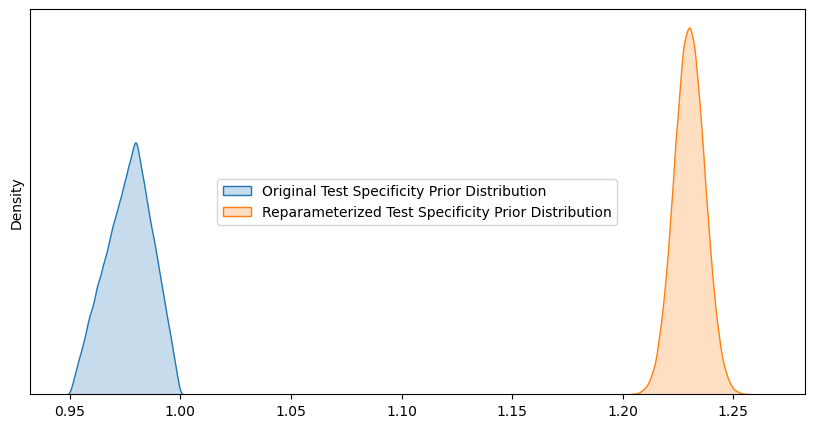

In [55]:
fig, axs = plt.subplots(1,1)
fig.set_figheight(5)
fig.set_figwidth(10)


sns.kdeplot(triang_sp, fill = True, label = 'Original Test Specificity Prior Distribution')
plt.yticks([])
# plt.axvline(x=0.98, color ='black')
# plt.annotate('A', (0.999, 38), fontsize = 16)
# plt.title('Original Test Specificity Prior Distribution')


sns.kdeplot(norm_sp, fill = True, label = 'Reparameterized Test Specificity Prior Distribution')
plt.yticks([])
# plt.axvline(x=1.23, color ='black')
# plt.annotate('B', (1.265, 56), fontsize = 16)
# plt.title('Reparameterized Test Specificity Prior Distribution')
plt.legend(loc = 'center')


/Users/meghanchilds/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


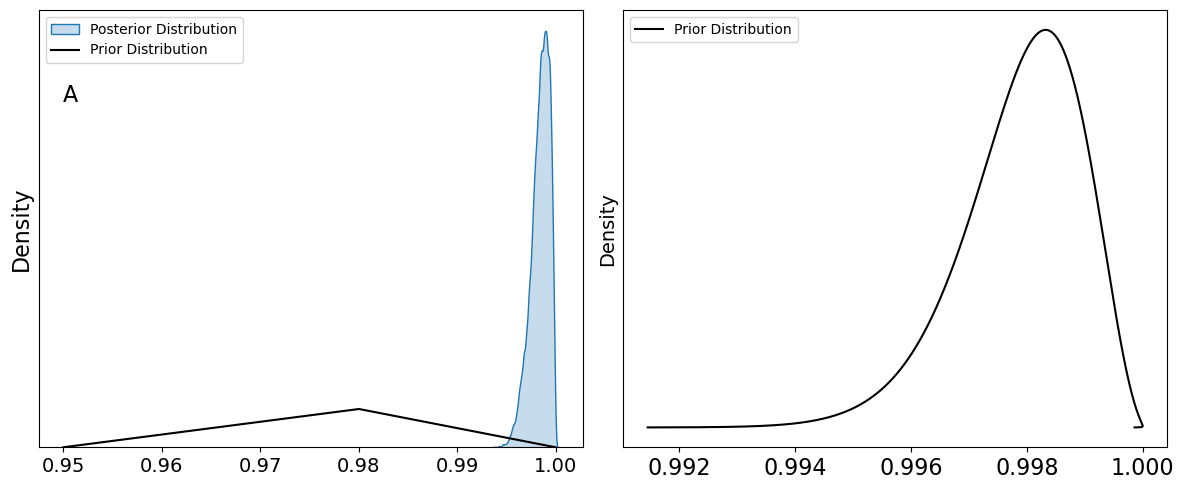

In [240]:
plt.subplots(1,2,figsize=(12,5))

plt.subplot(1,2,1)
sns.kdeplot(MCMC_Chain_Burn_In_F.iloc[:,7], fill = True, label = 'Posterior Distribution')
plt.plot(np.linspace(0.95, 1, 1000), triang.pdf(np.linspace(0.95, 1, 1000), c =0.6,loc=0.95, scale=0.05), color = 'k', label ='Prior Distribution')
plt.legend(loc = 'upper left')
plt.annotate('A',(0.95,360), fontsize= 16)
plt.xlabel('')
plt.ylabel('Density', fontsize=16)
plt.xticks(fontsize = 14)
plt.yticks([])
# plt.annotate('H', (1, 400), fontsize= 16)
plt.subplot(1,2,2)
plt.plot(np.linspace(1.2, 1.26, 1000), norm.pdf(np.linspace(1.2, 1.26, 1000),loc=1.23, scale=0.007), color = 'k', label ='Prior Distribution')
plt.ylabel('Density', fontsize=14)
plt.xticks(fontsize = 16)
plt.yticks([])
plt.annotate('B',(1.2,50), fontsize= 16)

plt.legend(loc = 'upper left')

plt.tight_layout()

In [242]:
[1.20, 1.21, 1.22, 1.23, 1.24, 1.25, 1.26]**2

TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

In [243]:
np.sin(1.2**2)

0.9914583481916864

In [244]:
np.sin(1.21**2)

0.9943133447869189

In [245]:
np.sin(1.22**2)

0.9966073427566622

In [246]:
np.sin(1.23**2)

0.9983244757779044